# Linear Dataset

Building and analysing the linear dataset.
<br>
The equation used to generate this dataset is linear.
<br>
w_11*__Age__ + w_21*__Dependents__ + w_22*__Annual_Income__ + w_31*__Monthly_loans__ + w_32*__Income_stability__ + w_41*__Portfolio_status__ + w_51*__Investment_obj__ + w_52*__Duration_inv__ + w_61*__Comfort__ + w_62*__Behaviour__ = output


The weights are specified in the paper as well as the calculator file.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Importing the necessary data files.

In [2]:
df_1 = pd.read_csv("Total_Linear_Data/x_11_linear_1.csv")
df_05 = pd.read_csv("Total_Linear_Data/x_11_linear_05.csv")
df_02 = pd.read_csv("Total_Linear_Data/x_11_linear_02.csv")

In [3]:
linear_df =pd.concat([df_1,df_05,df_02])

In [4]:
linear_df.head()

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output
0,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.2,4.661
1,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.3,4.726
2,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.5,4.856
3,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,0.9,5.116
4,1.0,1.0,0.2,1.0,0.1,0.4,0.65,0.5,1.0,1.0,5.181


##### Some general information regarding the dataset and it's columns.

Number of rows in the data

In [5]:
linear_df.shape

(3145725, 11)

In [6]:
linear_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145725 entries, 0 to 1048574
Data columns (total 11 columns):
Age                 float64
Dependents          float64
Annual_income       float64
Monthly_loans       float64
Income_stability    float64
Portfolio_status    float64
Investment_obj      float64
Duration_inv        float64
Comfort             float64
Behaviour           float64
output              float64
dtypes: float64(11)
memory usage: 288.0 MB


General stats

In [7]:
linear_df.describe()

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output
count,3.145725e+06,3.145725e+06,3.145725e+06,3.145725e+06,3.145725e+06,3.145725e+06,3.145725e+06,3.145725e+06,3.145725e+06,3.145725e+06,3.145725e+06
mean,5.666667e-01,7.258494e-01,5.668932e-01,6.050402e-01,4.993205e-01,5.399352e-01,6.299621e-01,6.500000e-01,5.400000e-01,5.800000e-01,4.406415e+00
std,3.299832e-01,2.650453e-01,2.860408e-01,2.812033e-01,3.388453e-01,1.495935e-01,2.039358e-01,1.000018e-01,3.611095e-01,3.187476e-01,6.826401e-01
min,2.000000e-01,1.000000e-01,2.000000e-01,2.000000e-01,1.000000e-01,4.000000e-01,4.000000e-01,5.000000e-01,1.000000e-01,2.000000e-01,1.764000e+00
25%,2.000000e-01,6.000000e-01,4.000000e-01,4.000000e-01,1.000000e-01,4.000000e-01,5.000000e-01,6.000000e-01,2.000000e-01,3.000000e-01,3.939000e+00
50%,5.000000e-01,8.000000e-01,6.000000e-01,6.000000e-01,3.000000e-01,5.000000e-01,6.000000e-01,6.500000e-01,5.000000e-01,5.000000e-01,4.407000e+00
75%,1.000000e+00,1.000000e+00,8.000000e-01,8.000000e-01,6.000000e-01,6.000000e-01,6.500000e-01,7.000000e-01,9.000000e-01,9.000000e-01,4.876000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e-01,1.000000e+00,8.000000e-01,1.000000e+00,1.000000e+00,7.150000e+00


In [8]:
for col in linear_df:
    print(col,":Unique Elements: ",linear_df[col].unique(),",Number of unique elements: ",len(linear_df[col].unique()))

Age :Unique Elements:  [1.  0.5 0.2] ,Number of unique elements:  3
Dependents :Unique Elements:  [1.  0.8 0.6 0.1] ,Number of unique elements:  4
Annual_income :Unique Elements:  [0.2 0.4 0.6 0.8 1. ] ,Number of unique elements:  5
Monthly_loans :Unique Elements:  [1.  0.8 0.6 0.4 0.2] ,Number of unique elements:  5
Income_stability :Unique Elements:  [0.1 0.3 0.6 1. ] ,Number of unique elements:  4
Portfolio_status :Unique Elements:  [0.4 0.6 0.5 0.8] ,Number of unique elements:  4
Investment_obj :Unique Elements:  [0.65 0.6  0.4  0.5  1.  ] ,Number of unique elements:  5
Duration_inv :Unique Elements:  [0.5  0.8  0.65 0.6  0.7 ] ,Number of unique elements:  5
Comfort :Unique Elements:  [1.  0.9 0.5 0.2 0.1] ,Number of unique elements:  5
Behaviour :Unique Elements:  [0.2 0.3 0.5 0.9 1. ] ,Number of unique elements:  5
output :Unique Elements:  [4.661 4.726 4.856 ... 2.28  2.11  2.175] ,Number of unique elements:  4222


In [6]:
linear_df.apply(lambda x: len(x.unique()))

Age                    3
Dependents             4
Annual_income          5
Monthly_loans          5
Income_stability       4
Portfolio_status       4
Investment_obj         5
Duration_inv           5
Comfort                5
Behaviour              5
output              4222
dtype: int64

##### Correlations in the entire dataset.

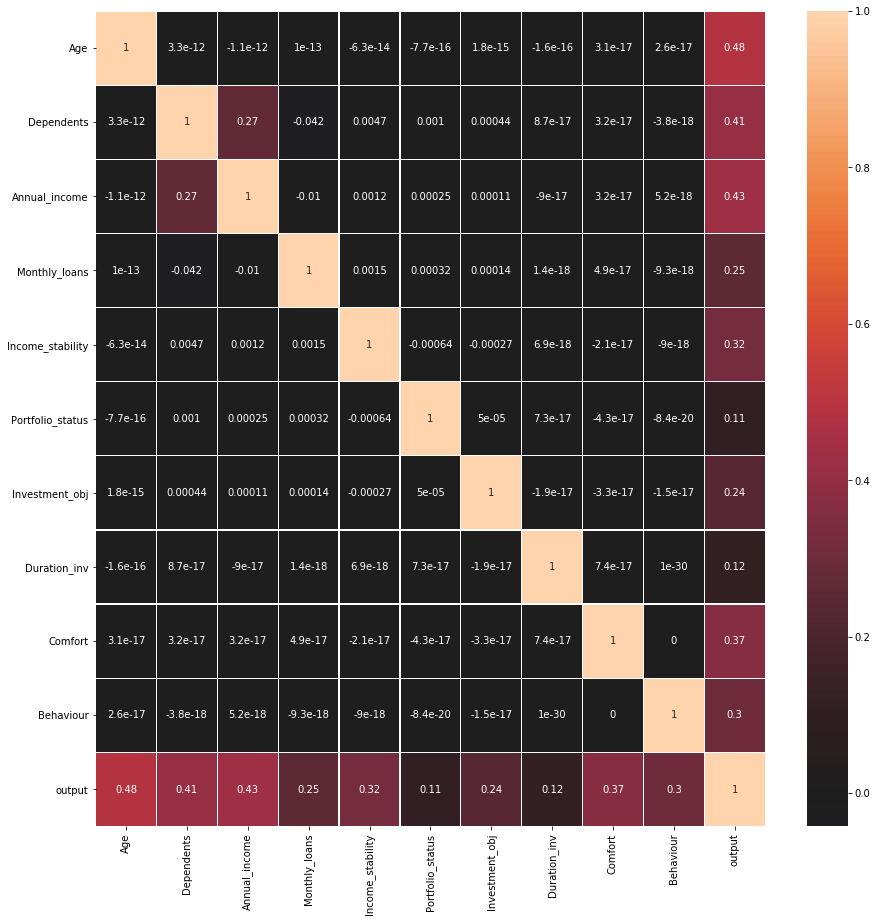

In [7]:
correlation_matrix = linear_df.corr()   #creating a heatmap of the attributes in the dataset
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix, center=0, annot=True, linewidths=.3)

##### Correlations of the features/questions with the output column

In this dataset, naturally weights will determine the most correlated features/variables with the output. Age, Annual_income and Dependents have higher weights therefore they show highest correlation with the output.

In [8]:
df_correlations = linear_df.corr()
df_correlations['output'].sort_values(ascending=False)

output              1.000000
Age                 0.483393
Annual_income       0.433492
Dependents          0.407723
Comfort             0.370293
Income_stability    0.324832
Behaviour           0.303507
Monthly_loans       0.251020
Investment_obj      0.239129
Duration_inv        0.117194
Portfolio_status    0.109877
Name: output, dtype: float64

##### The minima and maxima of the output generated. 

High output value means higher risk taking behaviour.

In [9]:
print(linear_df.output.min(), linear_df.output.max())

1.764 7.15


##### The plot shows the distribution of the output

The linear equation reflects a normal distribution. The output values need to be divided into __5__ categories. No risk, low risk, moderate risk, likes risk and high risk. 

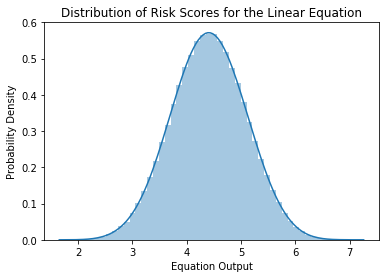

In [10]:
sns.distplot(linear_df.output,label="Distribution of Risk Scores")
plt.title("Distribution of Risk Scores for the Linear Equation")
plt.xlabel("Equation Output")
plt.ylabel("Probability Density")
plt.show()

Based on the above distribution the five categories are made using the following boundary conditions:
<br>
No Risk: output values below 3
<br>
Low Risk: 3 to 4
<br>
Moderate Risk: 4 to 4.9
<br>
Likes Risk: 5 to 5.8
<br>
High Risk: 5.8 above

In [11]:
df=linear_df
#Creating a new column with same values as output
df = df.assign(categories = df['output'])
#All observations below 1.5 in output column will get marked as category 1
df.loc[df['output'] <= 3, 'categories'] = 1
#Observations from 1.5 to 2.5 marked as category 2
df.loc[(df['output'] > 3) & (df['output'] <= 4) , 'categories'] = 2
#Observations from 2.5 to 3.5 marked as category 3
df.loc[(df['output'] > 4) & (df['output'] <= 4.9) , 'categories'] = 3
#Observations from 3.5 to 4.5 marked as category 4
df.loc[(df['output'] > 4.9) & (df['output'] <= 5.8) , 'categories'] = 4
#Observations above 4.5 marked as category 5
df.loc[df['output']>5.8, 'categories'] = 5

##### After the category division the normal distribution is maintained.

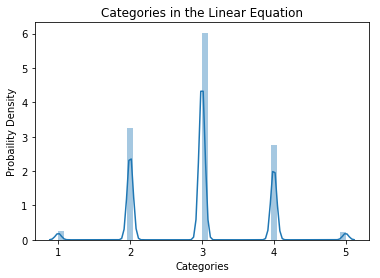

In [12]:
sns.distplot(df.categories)
plt.title("Categories in the Linear Equation")
plt.xlabel("Categories")
plt.ylabel("Probaility Density")
plt.show()

Number of elements in each category.

In [13]:
df.categories.value_counts()

3.0    1515986
2.0     817511
4.0     690604
1.0      60923
5.0      60701
Name: categories, dtype: int64

#### Stratified Sampling

A balanced sample is given to the regulator. The sample gives a small but complete representation of the dataset.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=3,test_size=0.3,random_state=42)
# n_splits= number of shuffles and iterations

#loop to stratify by category and store in train and test set
for train_index,test_index in split.split(df,df['categories']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

Here 30% of the dataset is taken finally. Both the datasets are similar as they exibhit similar correlations and variations and similar correlations with the output columns. This helps prove taking a small part of the dataset can be an adequately accurate represenatation.

In [15]:
strat_test_set.head()

,Age,Dependents,Annual_income,Monthly_loans,Income_stability,Portfolio_status,Investment_obj,Duration_inv,Comfort,Behaviour,output,categories
678977,0.5,0.6,0.2,0.2,0.3,0.6,0.60,0.70,1.0,0.5,3.854,2.0
907559,0.5,0.6,1.0,0.6,0.6,0.5,0.65,0.65,0.9,1.0,5.178,4.0
877304,0.2,0.6,1.0,1.0,0.1,0.4,0.50,0.65,1.0,1.0,4.713,3.0
470413,0.5,0.8,0.6,0.6,0.6,0.5,0.50,0.80,0.5,0.9,4.667,3.0
753429,0.5,0.6,0.6,1.0,0.3,0.4,0.40,0.65,1.0,1.0,4.731,3.0


##### Variations of the divisions are similar

In [16]:
strat_train_set.var()

Age                 0.108833
Dependents          0.070210
Annual_income       0.081856
Monthly_loans       0.079096
Income_stability    0.114853
Portfolio_status    0.022372
Investment_obj      0.041605
Duration_inv        0.009998
Comfort             0.130422
Behaviour           0.101605
output              0.465942
categories          0.632432
dtype: float64

In [17]:
strat_test_set.var()

Age                 0.109020
Dependents          0.070340
Annual_income       0.081735
Monthly_loans       0.079028
Income_stability    0.114729
Portfolio_status    0.022392
Investment_obj      0.041553
Duration_inv        0.010006
Comfort             0.130349
Behaviour           0.101589
output              0.466127
categories          0.632431
dtype: float64

##### There is a large difference in shapes of the datasets

In [18]:
print strat_train_set.shape,strat_test_set.shape,

(2202007, 12) (943718, 12)


##### Correlations with the output and category column.

Should be similar.

In [19]:
strat_test = strat_test_set.corr()
strat_test['output'].sort_values(ascending=False)


output              1.000000
categories          0.931334
Age                 0.483888
Annual_income       0.434645
Dependents          0.407873
Comfort             0.369814
Income_stability    0.324199
Behaviour           0.304626
Monthly_loans       0.249785
Investment_obj      0.237959
Duration_inv        0.117568
Portfolio_status    0.110054
Name: output, dtype: float64

In [20]:
#correlation of other variables with target variable
strat_test['categories'].sort_values(ascending=False)

categories          1.000000
output              0.931334
Age                 0.453045
Annual_income       0.404084
Dependents          0.374792
Comfort             0.345110
Income_stability    0.302768
Behaviour           0.283973
Monthly_loans       0.232607
Investment_obj      0.222040
Duration_inv        0.109305
Portfolio_status    0.103018
Name: categories, dtype: float64

#### Correlations of the new dataset

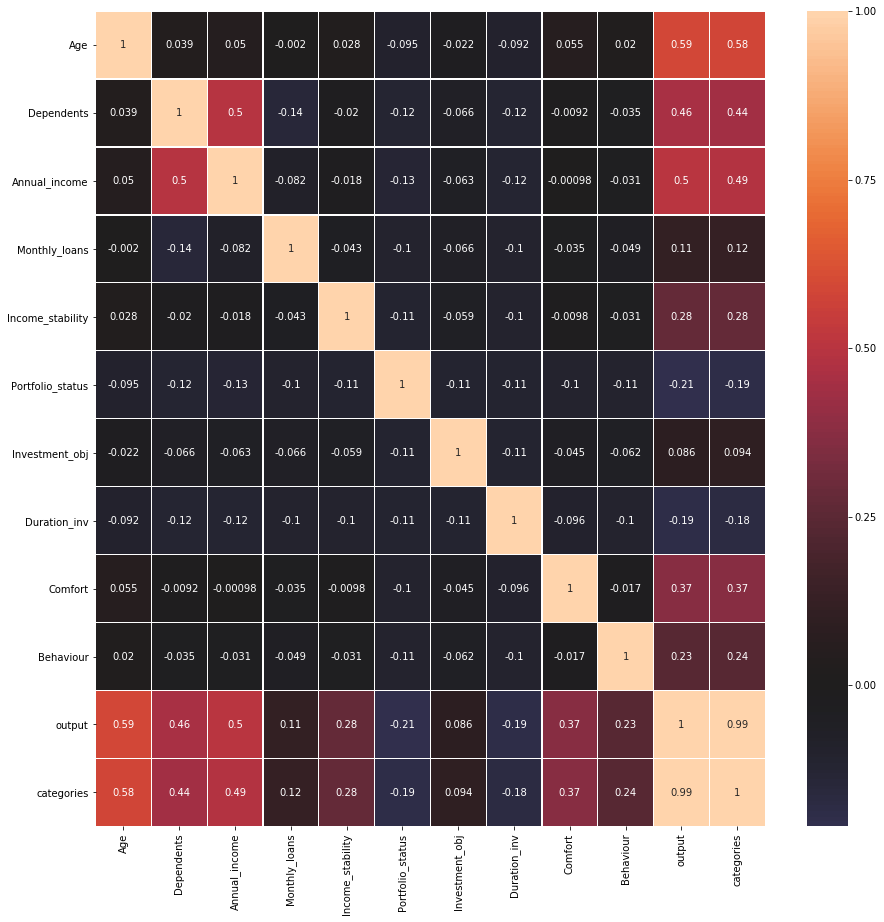

In [21]:
correlation_matrix_strat = strat_test.corr()   #creating a heatmap of the attributes in the dataset
plt.subplots(figsize=(15,15))
sns.heatmap(correlation_matrix_strat, center=0, annot=True, linewidths=.3)

Output file of the sample chosen

In [22]:
#strat_test_set.to_csv("linear_stratified_sample_27nov2019.csv")

##### Number of data points in all categories in the final dataset

In [23]:
strat_test_set.categories.value_counts()

3.0    454796
2.0    245254
4.0    207181
1.0     18277
5.0     18210
Name: categories, dtype: int64